# Result presentation by dataset

## Requirements :

Python packages required to run this notebook

- [jupyter](https://jupyter.org/)
- [ipywidgets](https://ipywidgets.readthedocs.io/en/latest/)
- [Python pandas](https://pandas.pydata.org/)
- [Python matplotlib](https://matplotlib.org/)
- [Python seaborn](https://seaborn.pydata.org/)
- [Python Plotly for jupyter](https://plotly.com/python/)
- [bokeh](https://bokeh.org/)

Restart the notebook in "Kernel" -> "Restart & Run All" when this notebook is opened.


## Dataset explanation

- **Experiment** : An experiment corresponds to a single set of parameters : wall time, clients size, aggregate size, number of constraints (days size).
    - An experiment can be replicated several times with different clients selections (random for the clients set and aggregates)
- Experiment **succèss** : An experiment is considered a success when the solver finds only one solution and does not hit the wall time.
- **Wall** time : Experiment maximum time. The experiment will be stop and mark as failed once the solver has run for this number of seconds.
- Clients **dataset** : Clients file
- **Clients size** : Number of clients available to the attacker. Generally a subset of the clients dataset.
- **Aggregate size** : Number of clients (from the clients available to the attacker) to be put in the aggregate
- **Days size** : Number of constraints (temporal point) available to the attacker and used in the attack


## Available parameters

Available with dataset :
- "daily_base_hphc" : Hackathon dataset with daily data
- "daily_issda" : ISSDA dataset with daily data
- "30_issda" : ISSDA dataset with 30' data

Available without fields :
- None

Available wall_time:
- 1000


After setting the parameters in the following code cell, restart and re-run all cells.

In [1]:
clients_with = "daily_issda"
clients_without = None #"_hphc_"
wall_time = 1000

## Loading raw data


Loading all the experiments results from the results CSV file and filtering for the selected dataset

In [2]:
%pylab inline

import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits.mplot3d import Axes3D
import plotly
import plotly.graph_objs as go
import plotly.express as px
from ipywidgets import interact
import ipywidgets as widgets
import IPython.display as ipdisplay

from bokeh.io import show, output_notebook
from bokeh.models import ColumnDataSource
from bokeh.plotting import figure

import warnings
warnings.filterwarnings('ignore')

pylab.rcParams['figure.figsize'] = (10, 6)
sns.set(font_scale=1.5)
output_notebook()

Populating the interactive namespace from numpy and matplotlib


Loading BokehJS ...

In [3]:
df = pd.read_csv("./v2_all.csv")

clients = df["clients"].unique()
clients = list(filter(lambda x: clients_with in x, clients))
if clients_without is not None:
    clients = list(filter(lambda x: clients_without not in x, clients))


df = df[(df["wall_time"] == wall_time) & (df["clients"].isin(clients))]
df.days_size = df.days_size.astype(int)
df.days_size_pc = df.days_size_pc.astype(int)
df.agg_size = df.agg_size.astype(int)
df.agg_size_pc = df.agg_size_pc.astype(int)
df.success = df.success.astype(int)

# Filter for number of days below 200% clients size
df = df[(df.days_size <= 2 * df.clients_size)]

df

Unnamed: 0                                 expe          clients  \
89427            0  ./expes/v2_2020-11-23_di_200-prng-1  daily_issda_250   
89428            1  ./expes/v2_2020-11-23_di_200-prng-1  daily_issda_250   
89429            2  ./expes/v2_2020-11-23_di_200-prng-1  daily_issda_250   
89430            3  ./expes/v2_2020-11-23_di_200-prng-1  daily_issda_250   
89431            4  ./expes/v2_2020-11-23_di_200-prng-1  daily_issda_250   
...            ...                                  ...              ...   
618361         178  ./expes/v2_2020-11-27_di_500-prng-2  daily_issda_500   
618362         179  ./expes/v2_2020-11-27_di_500-prng-2  daily_issda_500   
618363         180  ./expes/v2_2020-11-27_di_500-prng-2  daily_issda_500   
618364         181  ./expes/v2_2020-11-27_di_500-prng-2  daily_issda_500   
618365         182  ./expes/v2_2020-11-27_di_500-prng-2  daily_issda_500   

        clients_size clients_subset  agg_size method           days  \
89427            250        rng-250       141    rng  num-start-261   
89428            250        rng-250       171    rng  num-start-241   
89429            250        rng-250       111    rng  num-start-101   
89430            250        rng-250        81    rng  num-start-191   
89431            250        rng-250       161    rng  num-start-271   
...              ...            ...       ...    ...            ...   
618361           500        rng-500        91    rng  num-start-261   
618362           500        rng-500        61    rng   num-start-81   
618363           500        rng-500       151    rng  num-start-161   
618364           500        rng-500        11    rng  num-start-131   
618365           500        rng-500       131    rng  num-start-261   

        days_size  days_total  ...  days_size_pc  noise_method  score_avg  \
89427         261         536  ...           104           NaN        NaN   
89428         241         536  ...            96           NaN        NaN   
89429         101         536  ...            40           NaN        NaN   
89430         191         536  ...            76           NaN        NaN   
89431         271         536  ...           108           NaN        NaN   
...           ...         ...  ...           ...           ...        ...   
618361        261         536  ...            52           NaN        NaN   
618362         81         536  ...            16           NaN        NaN   
618363        161         536  ...            32           NaN        NaN   
618364        131         536  ...            26           NaN        NaN   
618365        261         536  ...            52           NaN        NaN   

        score_min  score_max  oracle  pool_size  uuid  infeasible  optimal  
89427         NaN        NaN     NaN        NaN   NaN         NaN      NaN  
89428         NaN        NaN     NaN        NaN   NaN         NaN      NaN  
89429         NaN        NaN     NaN        NaN   NaN         NaN      NaN  
89430         NaN        NaN     NaN        NaN   NaN         NaN      NaN  
89431         NaN        NaN     NaN        NaN   NaN         NaN      NaN  
...           ...        ...     ...        ...   ...         ...      ...  
618361        NaN        NaN     NaN        NaN   NaN         NaN      NaN  
618362        NaN        NaN     NaN        NaN   NaN         NaN      NaN  
618363        NaN        NaN     NaN        NaN   NaN         NaN      NaN  
618364        NaN        NaN     NaN        NaN   NaN         NaN      NaN  
618365        NaN        NaN     NaN        NaN   NaN         NaN      NaN  

[97824 rows x 30 columns]

## Extracting the interesting fields

Extract the clients size, number of days, aggregate size, aggregate size in percentage of the clients size, experiment success and experiment time from the raw dataset.

In [4]:
df_clean = df[["clients_size", "days_size", "days_size_pc", "agg_size", "agg_size_pc", "success", "nsols", "wall_hit", "time", "wall_time"]]
df_clean = df_clean.sort_values(by=['clients_size', 'agg_size', 'agg_size_pc', 'days_size'], ascending=True)
df_clean = df_clean[(df_clean.days_size_pc <= 200)]
df_clean

clients_size  days_size  days_size_pc  agg_size  agg_size_pc  success  \
394715            50          1             2         1            2        1   
395040            50          1             2         1            2        1   
395164            50          1             2         1            2        1   
395476            50          1             2         1            2        1   
395555            50          1             2         1            2        1   
...              ...        ...           ...       ...          ...      ...   
274018          4000        291             7      3501           87        0   
274041          4000        291             7      3501           87        0   
274275          4000        291             7      3501           87        0   
274379          4000        291             7      3501           87        0   
274817          4000        291             7      3501           87        0   

        nsols  wall_hit         time  wall_time  
394715      1     False     0.009274       1000  
395040      1     False     0.008175       1000  
395164      1     False     0.008116       1000  
395476      1     False     0.012531       1000  
395555      1     False     0.010346       1000  
...       ...       ...          ...        ...  
274018      0      True  1074.059237       1000  
274041      0      True  1071.965445       1000  
274275      0      True  1058.524741       1000  
274379      0      True  1107.033651       1000  
274817      0      True  1118.246626       1000  

[97824 rows x 10 columns]

In [5]:
df_clean[(df_clean.success == False)]

clients_size  days_size  days_size_pc  agg_size  agg_size_pc  success  \
394826            50          1             2        11           22        0   
394923            50          1             2        11           22        0   
395065            50          1             2        11           22        0   
395086            50          1             2        11           22        0   
395103            50          1             2        11           22        0   
...              ...        ...           ...       ...          ...      ...   
274018          4000        291             7      3501           87        0   
274041          4000        291             7      3501           87        0   
274275          4000        291             7      3501           87        0   
274379          4000        291             7      3501           87        0   
274817          4000        291             7      3501           87        0   

        nsols  wall_hit         time  wall_time  
394826      2     False     0.863830       1000  
394923      2     False     2.216709       1000  
395065      2     False     1.349430       1000  
395086      2     False     1.727619       1000  
395103      2     False     0.730053       1000  
...       ...       ...          ...        ...  
274018      0      True  1074.059237       1000  
274041      0      True  1071.965445       1000  
274275      0      True  1058.524741       1000  
274379      0      True  1107.033651       1000  
274817      0      True  1118.246626       1000  

[34238 rows x 10 columns]

## Global statistics

### Success rate computation

Compute for each (clients size, days size, aggregate size) triplet :
- success_count : Number of experiments with the given client_size, days_size, agg_size
- success_sum : Number of success
- success_rate : success_sum / success_count (0 : all failed, 1 : all success)
- time_min : Shortest time (All experiments, independent from success)
- time_max : Maximum time
- time_mean : Average time

In [6]:
df_taux = df_clean.groupby(by=["clients_size", "days_size", "days_size_pc", "agg_size", "agg_size_pc"])\
    .agg({
        "success": ["count", "sum"],
        "time": ["min", "max", "mean"]
    })
df_taux.columns = ["_".join(x) for x in df_taux.columns.ravel()]
df_taux = df_taux.reset_index()
df_taux["success_rate"] = df_taux["success_sum"] / df_taux["success_count"]
df_taux

clients_size  days_size  days_size_pc  agg_size  agg_size_pc  \
0               50          1             2         1            2   
1               50          1             2        11           22   
2               50          1             2        21           42   
3               50          1             2        31           62   
4               50          1             2        41           82   
...            ...        ...           ...       ...          ...   
5385          4000        291             7      1501           37   
5386          4000        291             7      2001           50   
5387          4000        291             7      2501           62   
5388          4000        291             7      3001           75   
5389          4000        291             7      3501           87   

      success_count  success_sum     time_min     time_max    time_mean  \
0                20           20     0.008116     0.127478     0.015570   
1                20            0     0.360530     2.216709     1.071868   
2                20            0     0.355109     2.440183     1.128689   
3                20            0     0.310326     2.097747     1.012020   
4                20            0     0.291477     1.740608     0.763686   
...             ...          ...          ...          ...          ...   
5385             20            0  1040.105016  1116.365619  1077.429289   
5386             20            0  1040.409935  1114.316362  1070.668045   
5387             20            0  1057.674070  1115.345646  1087.832666   
5388             20            0  1042.929563  1115.433985  1078.238162   
5389             20            0  1041.194184  1118.246626  1076.921457   

      success_rate  
0              1.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0  
...            ...  
5385           0.0  
5386           0.0  
5387           0.0  
5388           0.0  
5389           0.0  

[5390 rows x 11 columns]

### Minimal number of days for the attack success per aggregate size percentage

Get the minimal number of days before there is at least one success for a given clients size and aggregate size (in percentage of the total number of clients).
All the experiments below the lines failed, at least one experiment above the line has been successful.

In [7]:
df_amin = df_clean[(df_clean["success"] == True)]
df_amin = df_amin[["clients_size", "agg_size_pc", "days_size", "days_size_pc", "time"]]
df_amin = df_amin.loc[df_amin.groupby(by=["clients_size", "agg_size_pc"])["days_size"].idxmin()]
df_amin

fig = px.line_3d(df_amin, x="clients_size", y="agg_size_pc", z="days_size", color="clients_size")
fig.show()

In [8]:
ax = sns.lineplot(data=df_amin, x="agg_size_pc", y="days_size", hue="clients_size")
ax.set(xlabel="Aggregate size (in % of $|\mathcal{S}|$)", ylabel='Number of constraints')
plt.legend(bbox_to_anchor=(0.78, 1), loc=2, ncol=1, title="Number of\nindividuals")

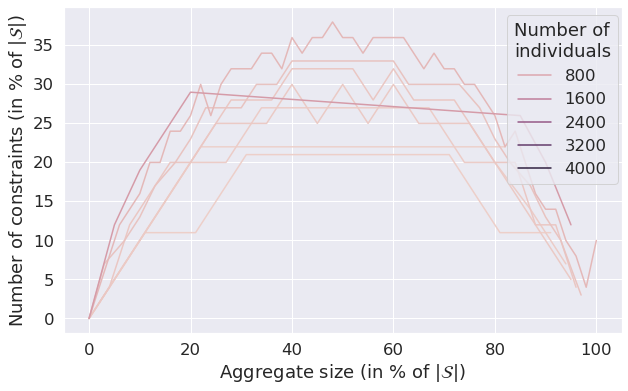

In [9]:
ax = sns.lineplot(data=df_amin, x="agg_size_pc", y="days_size_pc", hue="clients_size")
ax.set(xlabel="Aggregate size (in % of $|\mathcal{S}|$)", ylabel='Number of constraints (in % of $|\mathcal{S}|$)')
plt.legend(bbox_to_anchor=(0.78, 1), loc=2, ncol=1, title="Number of\nindividuals")

### Attack success rate function of the clients size and the number of days

Rate computed from all the aggregate sizes.

For a given clients size and days size, the success rate is computed as follow :

- Total number of successful experiments / Total number of experiments

A rate of 0 means all the experiments had failed, a rate of 1 means all the experiments succeed.

In [10]:
df_taux_cs = df_taux.groupby(by=["clients_size", "days_size"]).agg({
    "success_count": "sum",
    "success_sum": "sum"
})
df_taux_cs = df_taux_cs.reset_index()

df_taux_cs["success_rate"] = df_taux_cs["success_sum"] / df_taux_cs["success_count"]

df_taux_cs

clients_size  days_size  success_count  success_sum  success_rate
0              50          1            100           20         0.200
1              50         11            100          100         1.000
2              50         21            100          100         1.000
3              50         31            100          100         1.000
4              50         41            100          100         1.000
..            ...        ...            ...          ...           ...
245          4000        251            160           20         0.125
246          4000        261            160           20         0.125
247          4000        271            160           20         0.125
248          4000        281            160           20         0.125
249          4000        291            160           20         0.125

[250 rows x 5 columns]

In [11]:
fig = px.line_3d(df_taux_cs, x="clients_size", y="days_size", z="success_rate", color="clients_size")
fig.show()

### Experiments result type

Show the percentage of each experiment result type.

Nsols :

- 0 : The experiment failed (wall time hit)
- 1 : The experiment find only one solution (attack success)
- 2 : The experiment found at least two solution. The attack could not find an exact candidate but we still gained some knowledge.

nsols  success  num_expe      rate
0      0    30792     97824  0.314769
1      1    63838     97824  0.652580
2      2     3194     97824  0.032650

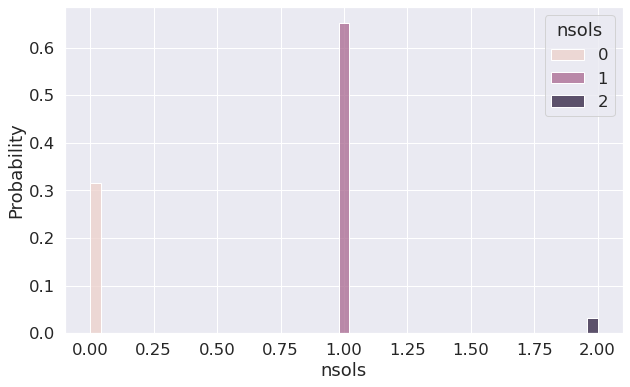

In [12]:
num_expe = df.success.count()
df_suc = df.groupby(by=["nsols"])["success"].count().reset_index()
df_suc["num_expe"] = num_expe
df_suc["rate"] = df_suc["success"] / num_expe
    
ax = sns.histplot(data=df, x="nsols", hue="nsols", multiple="stack", stat="probability")

df_suc

## Statistics depending on the number of clients

In [13]:
# Slider for fixed step columns values
def gen_slider_fs(df, col, f, extra=None):
    vals = df[col].unique()
    
    amin = vals.min()
    amax = vals.max()
    step = vals[1] - vals[0] if len(vals) > 1 else 1
    
    widgets.interact(f, x=(amin, amax, step), extra=widgets.fixed(extra))

# Slider for variable step columns values
def gen_slider_vs(df, col, f, extra=None):
    vals = sort(df[col].unique())
    widgets.interact(f, x=vals, extra=widgets.fixed(extra))

In [14]:
# Heatmap computation
def hm(x, extra):
    df, col_var, col_x, col_y, name_x, name_y = extra
    
    df_hm = df[df[col_var] == x]
    df_hm[col_x] = df_hm[col_x].astype(str)
    df_hm[col_y] = df_hm[col_y].astype(str)
    
    df_hm = pd.pivot_table(data=df_hm, values="success", index=[col_y], columns=[col_x])
    cols = [str(x) for x in sorted([int(x) for x in df_hm.columns])]
    df_hm = df_hm[cols]
    df_hm.index = df_hm.index.map(int)
    df_hm = df_hm.sort_values(by=[col_y], ascending=False)
    
    # Custom color
    boundaries = [0.0, 1.0]  # custom boundaries
    hex_colors = sns.light_palette('navy', n_colors=len(boundaries) * 2 + 2, as_cmap=False).as_hex()
    
    hex_colors = ['#001930', '#e3f1f9']
    #hex_colors = ['#007ff4', '#d7e9fb', '#e3f1f9']

    colors=list(zip(boundaries, hex_colors))

    custom_color_map = LinearSegmentedColormap.from_list(
        name='custom_navy',
        colors=colors,
    )
    
    ax = sns.heatmap(data=df_hm, linewidths=.01, square=True, cmap=custom_color_map, cbar_kws={
        "shrink": 0.65,
        "label": "Success rate",
    })
    
    ax.set(xlabel=name_x, ylabel=name_y)
    
    plt.tight_layout()
    plt.yticks(rotation=0)
    

### Success rate function of the number of days and the aggregate size depending on the number of clients

variable **x** : Client size.
(The graph generation may take some time)

Show the success rate function of the number of days (x axis) and the aggregate size (y axis) for a given number of clients.

A rate of 0 means all the experiments had failed, a rate of 1 means all the experiments succeed.

In [15]:
col_var = "clients_size"
col_x = "days_size"
col_y = "agg_size"
gen_slider_vs(df_clean, col_var, hm, (df_clean, col_var, col_x, col_y, "Number of constraints", "Aggregate size"))

interactive(children=(Dropdown(description='x', options=(50, 100, 150, 200, 250, 300, 500, 1000, 4000), value=…

### Success rate function of the number of days (in total clients size %) and the aggregate size (in clients size %)

In [16]:
col_var = "clients_size"
col_x = "days_size_pc"
col_y = "agg_size_pc"
gen_slider_vs(df_clean, col_var, hm, (df_clean, col_var, col_x, col_y, "Number of constraints\n(in % of the clients size)", "Aggregate size\nin % of the clients size"))

interactive(children=(Dropdown(description='x', options=(50, 100, 150, 200, 250, 300, 500, 1000, 4000), value=…

### Success rate function of the number of days and the aggregate size depending on the number of clients

variable **x** : Client size (the graph generation may take some time)

Show the success rate function of the number of days (x axis) and the aggregate size in percentage of the number of clients (y axis) for a given number of clients.

A rate of 0 means all the experiments had failed, a rate of 1 means all the experiments succeed.

In [17]:
col_var = "clients_size"
col_x = "days_size"
col_y = "agg_size_pc"
gen_slider_vs(df_clean, col_var, hm, (df_clean, col_var, col_x, col_y, "Number of constraints", "Aggregate percentage"))

interactive(children=(Dropdown(description='x', options=(50, 100, 150, 200, 250, 300, 500, 1000, 4000), value=…

### Successfull attack time depending on the clients size

Variable **x** : Number of clients.
(The graph generation may take some time)

Show the time (in seconds) took by successful attacks in function of the number of days for a given number of clients. Each colored line represent the mean attack time for an aggregate size. The colored area around represents the 95% confidence interval.

In [18]:
# Success time
def success_time(x, extra):
    df, col_var, col_x, name_x = extra
    
    df_days = df[(df[col_var] == x) & (df.success == True)]
    df_days.agg_size = df_days.agg_size.astype(str)
    
    
    ax = sns.lineplot(data=df_days, x=col_x, y="time", hue="agg_size", style="agg_size", markers=True, dashes=False)
    
    ax.set(xlabel=name_x, ylabel='Time (seconds)')
    
    
    plt.legend(bbox_to_anchor=(0.0, 0.45), loc=2, ncol=5, title="Aggregate size")
    #ax.legend()

    
    if len(df_days[df_days.time > df_days.wall_time]) > 0:
        wall = df_days.wall_time.unique()[0]
        x_max = df_days[col_x].max()
        
        #print(wall)
        plt.plot([0, x_max], [wall, wall], linewidth=1.5, color="red")
        ax.text(0, wall +10, "Above wall time", horizontalalignment='left', size='medium', color='red')
    

In [19]:
col_var = "clients_size"
col_x = "days_size"
gen_slider_vs(df_clean, col_var, success_time, (df_clean, col_var, col_x, 'Number of constraints'))

interactive(children=(Dropdown(description='x', options=(50, 100, 150, 200, 250, 300, 500, 1000, 4000), value=…

### Successfull attack time depending on the number of constraints (%) per clients size

In [20]:
col_var = "clients_size"
col_x = "days_size_pc"
gen_slider_vs(df_clean, col_var, success_time, (df_clean, col_var, col_x, 'Number of constraints (in % of the clients size)'))

interactive(children=(Dropdown(description='x', options=(50, 100, 150, 200, 250, 300, 500, 1000, 4000), value=…

### Experiment result type depending on the client size

Variable **x** : Number of clients (The graph generation may take some time)

Show the experiment result type function of the number of constraints (days_size) for a given client size.


Nsol : 
- **0** : The experiment failed : the wall was hit or the model was stated infeasible.
- **1** : The wall was not hit and the solver found only one solution (attack success)
- **2** : The wall was not hit and the solver found at least two solution. 

In [21]:
from bokeh.models import FactorRange
from bokeh.transform import factor_cmap



def _apply(group):
    c = group['success'].sum()
    group["count"] = c
    group["rate"] = group["success"] / c
    
    return group

def _merge_all(z):
    l = []
    
    for x in z:
        for y in x:
            l.append(y)
        
    return l
    

def result_type(x, extra):
    df, col = extra
    
    df = df[df[col] == x]
        
    df_g = df.groupby(by=["days_size", "nsols"]).agg({
        "success": "count"
    }).reset_index()
    df_g = df_g.groupby(by=["days_size"]).apply(_apply)
    
    df_p = df_g.pivot(index="days_size", columns="nsols", values="rate").reset_index()
    df_p = df_p.fillna(0.)
    df_p.columns = [str(x) for x in df_p.columns]
    df_p.days_size = df_p.days_size.astype(str)
    
    #return df_p
    
    days_sizes = [ str(x) for x in df.days_size.unique() ]
    nsols = [str(x) for x in df.nsols.unique()]

    colors = ["#c9d9d3", "#718dbf", "#e84d60"][:len(nsols)]
    tooltips = [(nsol, "@" + nsol) for nsol in nsols]
    
    p = figure(x_range=days_sizes, plot_height=250, tooltips=tooltips)

    p.vbar_stack(nsols, x='days_size', width=0.9, source=df_p, legend_label=nsols, color=colors)

    p.y_range.start = 0
    p.x_range.range_padding = 0.1
    p.xaxis.major_label_orientation = 1
    p.axis.minor_tick_line_color = None
    p.outline_line_color = None
    p.xgrid.grid_line_color = None

    show(p)
    
col = "clients_size"
gen_slider_vs(df_clean, col, result_type, (df_clean, col))

interactive(children=(Dropdown(description='x', options=(50, 100, 150, 200, 250, 300, 500, 1000, 4000), value=…

## Statistics depending on the number of constraints (days size)

### Success rate function of the number of clients and the aggregate size depending the the number of days

Variable **x** : Number of constraints (days)

Show the success rate function of the aggregate size (x axis) and the number of clients (y axis) for a given number of constraints (days).

A rate of 0 (black) means all the experiments had failed, a rate of 1 (camel) means all the experiments succeed. A blank area for a given aggregate size / clients size couple means that no experiments where conducted for those values.

In [22]:
col_var = "days_size"
col_x = "agg_size"
col_y = "clients_size"
gen_slider_vs(df_clean, col_var, hm, (df_clean, col_var, col_x, col_y, "Aggregate size", "Number of individuals"))

interactive(children=(Dropdown(description='x', options=(1, 11, 21, 31, 41, 50, 51, 61, 71, 81, 91, 100, 101, …

## Statistics for a given point

In [23]:
w_clients_size = widgets.Select(
    options = df_clean.clients_size.unique(),
    value=df_clean.clients_size.unique()[0],
    description='Client size',
    rows=1
)

w_days_size = widgets.Select(
    options = df_clean.days_size.unique(),
    value = df_clean.days_size.unique()[0],
    description='Days size',
    rows=1
)

w_agg_size = widgets.Select(
    options = df_clean.agg_size.unique(),
    value = df_clean.agg_size.unique()[0],
    description='Aggregate size',
    rows=1
)

out = widgets.Output()

def display_meta(df_sub):
    num_expe = df_sub.success.count()
    success_count = df_sub.success.sum()
    success_rate = success_count / num_expe
    
    with out:
        display(ipdisplay.Markdown("### Raw experiments values :"))
        display(ipdisplay.Markdown("(only the first 5 elements)"))
        display(df_sub.head())
        
        display(ipdisplay.Markdown("### Success rate :"))
        display(ipdisplay.Markdown("Total number of experiments :" + str(num_expe)))
        display(ipdisplay.Markdown("Number of success :" + str(success_count)))
        display(ipdisplay.Markdown("Success rate : " + str(success_rate)))
        
def display_success(df_sub):
    num_expe = df_sub.success.count()
    df_suc = df_sub.groupby(by=["nsols"])["success"].count().reset_index()
    df_suc["rate"] = df_suc["success"] / num_expe
    
    fig = sns.barplot(data=df_suc, x="nsols", y="rate")
    
    with out:
        display(ipdisplay.Markdown('### Experiments results type'))
        display(ipdisplay.Markdown('- 0 : No solution found (generally wall hit)'))
        display(ipdisplay.Markdown('- 1 : Only one solution found.'))
        display(ipdisplay.Markdown('- 2 : Two solutions found.'))
        display(df_suc.head())
        display(fig.figure)
    plt.close()
        
def display_time(df_sub):
    fig, ax = plt.subplots(1, 2)
        
    sns.boxplot(data=df_sub, y="time", ax=ax[0])
    sns.swarmplot(data=df_sub, y="time", color=".2", ax=ax[0])
    ax[0].set(xlabel="All times", ylabel="Time (seconds)")
        
    sns.boxplot(data=df_sub, x="success", y="time", ax=ax[1])
    sns.swarmplot(data=df_sub, x="success", y="time", color=".25", ax=ax[1])
    ax[1].set(xlabel="Success (0: Failed, 1: Success)", ylabel="Time (seconds)")
    
    with out:
        display(ipdisplay.Markdown("### Time :"))
        display(ipdisplay.Markdown("""
        Time took by the experiments (in seconds) for this set of parameters.
        The left graph show the time independently of the experiments success 
        and the right one depending on the success.
        """))
        display(fig)
        
        plt.close()
    

def on_change(val):
    # Fetch parameters
    cs = w_clients_size.value
    ds = w_days_size.value
    ags = w_agg_size.value
    
    # Gather data and calc stats
    df_sub = df_clean[(df_clean.clients_size == cs) & (df_clean.days_size == ds) & (df_clean.agg_size == ags)]
    
    # Display results
    out.clear_output()
    
    if len(df_sub.index) == 0:
        with out:
            display(ipdisplay.Markdown("No data available for this set of points"))
    else:
        display_meta(df_sub)
        display_time(df_sub)
        display_success(df_sub)

w_clients_size.observe(on_change, 'value')
w_days_size.observe(on_change, 'value')
w_agg_size.observe(on_change, 'value')

display(w_clients_size)
display(w_days_size)
display(w_agg_size)

on_change(None)

out

Select(description='Client size', options=(50, 100, 150, 200, 250, 300, 500, 1000, 4000), rows=1, value=50)

Select(description='Days size', options=(1, 11, 21, 31, 41, 51, 61, 71, 81, 91, 101, 111, 121, 131, 141, 151, …

Select(description='Aggregate size', options=(1, 11, 21, 31, 41, 51, 61, 71, 81, 91, 101, 111, 121, 131, 141, …

Output()